In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy.stats import norm

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
# the plan is to simulate intensity distribution by using a Poisson distribution
# over a small area.  The first thing that we have to figure out is over which length
# a normal distribution will be non-zero given double resolution
w = 2 # is the way the Gaussian width is defined in optics
sigma = w/2
ep = 1.0
x = np.linspace(-20,20,200)
intensity = ep*sigma*np.sqrt(2*np.pi)*norm.pdf(x, loc=0,scale=sigma)
#print(intensity)
print(x[1],x[-2])

-19.798994974874372 19.798994974874375


In [3]:
# set limits and define the length of the box
xlim1 = x[1]
xlim2 = x[-2]
L = xlim2-xlim1
print(L)

39.59798994974875


In [4]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 5
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

78.98656204932891


In [5]:
N_samples = 1000000
N_draws = np.random.poisson(N_avg_L,N_samples)
int_list = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws]
int_list = np.array(int_list)

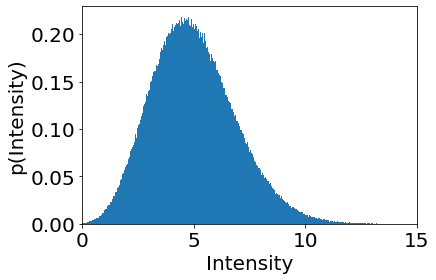

In [6]:
_ = plt.hist(int_list,bins=500,density=True)
#plt.ylim((0,1))
plt.xlim((0,15))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("OneDN5w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN5.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [27]:
int_list.mean(),int_list.max(),int_list.min()

(5.000384273012121, 16.14965602484255, 0.001778283725304505)

In [28]:
delta_ts=np.random.exponential(0.1/int_list)
print(delta_ts.mean(),delta_ts.min(),delta_ts.max())

0.024392204452591167 9.250798132369602e-09 97.0852005881202


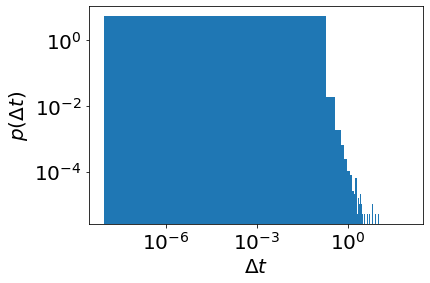

In [31]:
_ = plt.hist(delta_ts,bins=500,density=True)
#plt.ylim((0,1))
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\Delta t$")
plt.ylabel("$p(\Delta t)$")
plt.savefig("Onedt5w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN5.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [13]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 2
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

N_samples = 1000000
N_draws2 = np.random.poisson(N_avg_L,N_samples)
int_list2 = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws2]
int_list2 = np.array(int_list2)

31.594624819731564


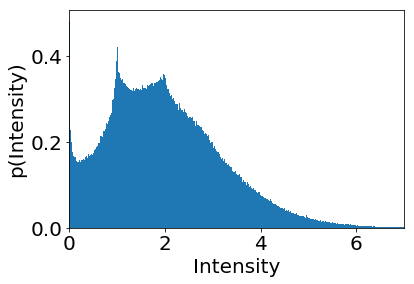

In [14]:
_ = plt.hist(int_list2,bins=500,density=True)
#plt.ylim((0,1))
plt.xlim((0,7))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("OneDN2w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN2.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [15]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 1
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

N_samples = 1000000
N_draws1 = np.random.poisson(N_avg_L,N_samples)
int_list1 = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws1]
int_list1 = np.array(int_list1)

15.797312409865782


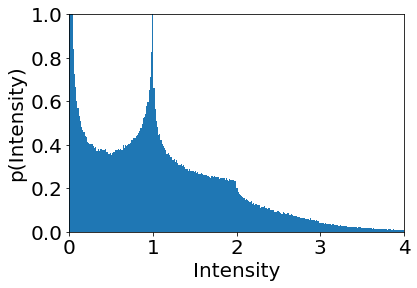

In [16]:
_ = plt.hist(int_list1,bins=500,density=True)
plt.ylim((0,1))
plt.xlim((0,4))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("OneDN1w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN1.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [17]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 0.5
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

N_samples = 1000000
N_draws05 = np.random.poisson(N_avg_L,N_samples)
int_list05 = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws05]
int_list05 = np.array(int_list05)

7.898656204932891


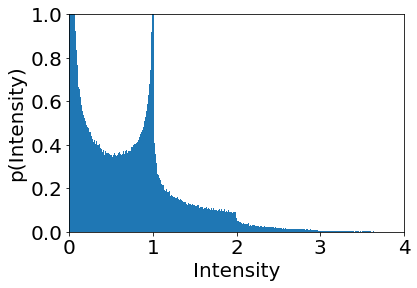

In [18]:
_ = plt.hist(int_list05,bins=500,density=True)
plt.ylim((0,1))
plt.xlim((0,4))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("OneDN05w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN05.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [32]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 0.2
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

N_samples = 1000000
N_draws02 = np.random.poisson(N_avg_L,N_samples)
int_list02 = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws02]
int_list02 = np.array(int_list02)

3.1594624819731565


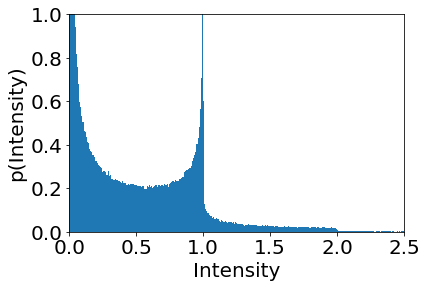

In [33]:
_ = plt.hist(int_list02,bins=500,density=True)
plt.ylim((0,1))
plt.xlim((0,2.5))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("OneDN02w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN02.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [76]:
delta_ts02=np.random.exponential(1/int_list02)
delta_ts02noinf = delta_ts02[delta_ts02 < 1000]
print(delta_ts02noinf.mean(),delta_ts02noinf.min(),delta_ts02noinf.max())
print(delta_ts02noinf)

56.56568369049713 3.2158306611542227e-07 999.9802549936322
[8.38753119e+01 4.41979498e-02 7.92572981e-02 ... 8.14801829e-02
 3.37971251e-01 5.29306316e-01]


/Users/hstrey/anaconda3/envs/pymc3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


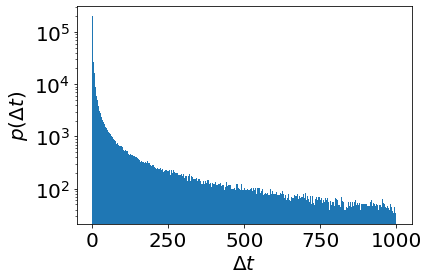

In [77]:
_ = plt.hist(delta_ts02noinf,bins=500)
#plt.ylim((0,1))
#plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\Delta t$")
plt.ylabel("$p(\Delta t)$")
plt.savefig("Onedt02w2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN5.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")